In [1]:
import os, cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2 
import random
import pickle

from tqdm import tqdm #progress bar
from tensorflow.keras.callbacks import TensorBoard

NAME = "Cats-vs-dogs-CNN"
DATADIR = "PetImages"
CATEGORIES = ["Cat", "Dog"]
IMG_SIZE = (50, 50)

tensorboard = TensorBoard(log_dir="./PetImages/{}".format(NAME))

In [2]:
dataset = []
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    label = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
        try:
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            img_array = cv2.resize(img_array, IMG_SIZE)            
            dataset.append([img_array, label])            
            #plt.imshow(img_array, cmap='gray')  # graph it
            #plt.show()  # display!
        except:
            pass            

100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [01:13<00:00, 170.26it/s]


In [3]:
%%time

random.shuffle(dataset)
pickle.dump(dataset, open("pets.pickle", "wb"))

Wall time: 239 ms


In [6]:
dataset = pickle.load(open("pets.pickle", "rb"))

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize


X = []
y = []
for feature, label in dataset:
    X.append(feature)
    y.append(label)
    
X = np.array(X) / 255
y = np.array(y)

X = X.reshape(-1, 50, 50, 1) #reshape to have 1 level deep
#X = normalize(X, axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape = X.shape[1:], activation=tf.nn.relu)) # the shape of the image not X
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3, 
              callbacks=[tensorboard])

Epoch 1/3
  1/546 [..............................] - ETA: 0s - loss: 1.2184 - accuracy: 0.3438WARNING:tensorflow:From C:\Users\ausle\python_kernels\ml_with_tensor\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
546/546 [==============================] - 41s 76ms/step - loss: 0.6848 - accuracy: 0.5888 - val_loss: 0.6858 - val_accuracy: 0.5429
Epoch 2/3
546/546 [==============================] - 41s 74ms/step - loss: 0.6447 - accuracy: 0.6478 - val_loss: 0.6476 - val_accuracy: 0.6730
Epoch 3/3
546/546 [==============================] - 41s 75ms/step - loss: 0.6216 - accuracy: 0.6850 - val_loss: 0.6416 - val_accuracy: 0.6905


In [9]:
print(X.shape)

(24946, 50, 50, 1)


1


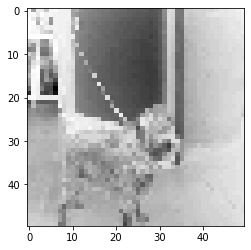

In [10]:
print(y[2])
plt.imshow(X[2], cmap=plt.cm.binary)

In [13]:
model.predict(X[:2])

array([[0.415436 ],
       [0.3873272]], dtype=float32)